<a href="https://colab.research.google.com/github/MatiasRoman96/PDI/blob/main/Trabajo%20integrador/%20004_Trabajo_integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

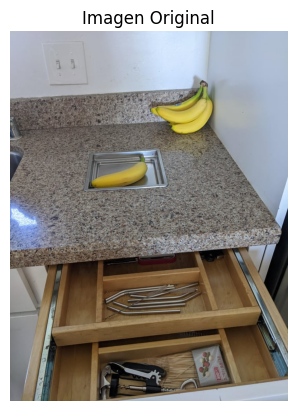

Objeto 2: Área = 3474.50 px², Perímetro = 318.55 px
Objeto 3: Área = 7193.50 px², Perímetro = 408.63 px


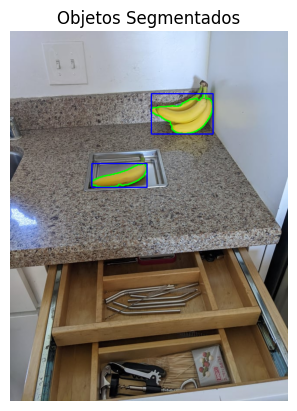

In [7]:
# Importar las librerías necesarias
import cv2  # OpenCV para procesamiento de imágenes
import numpy as np  # Para operaciones con matrices
import matplotlib.pyplot as plt  # Para mostrar imágenes
import urllib.request  # Para descargar la imagen desde una URL

# ======================
# 📷 CARGA DE IMAGEN
# ======================
url = 'https://preview.redd.it/staying-at-an-airbnb-and-we-have-this-little-metal-tray-v0-1bzx977uj1h81.jpg?width=640&crop=smart&auto=webp&s=692a9e0798632981b5d320b80d3d04388177288f'
urllib.request.urlretrieve(url, 'frutas.jpg')  # Descargar la imagen desde la URL

# Cargar la imagen descargada
img = cv2.imread('frutas.jpg')

# Convertir la imagen de BGR a RGB para mostrarla correctamente en Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original con Matplotlib
plt.imshow(img_rgb)
plt.title("Imagen Original")  # Título de la imagen
plt.axis("off")  # Desactivar los ejes
plt.show()  # Mostrar la imagen

# Convertir la imagen de BGR a HSV, ya que HSV es más adecuado para segmentar colores
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color para el color amarillo (puedes ajustar estos valores según el color que desees)
# Rango de color amarillo en espacio HSV
lower_color = np.array([20, 100, 100])  # Limite inferior de color amarillo
upper_color = np.array([35, 255, 255])  # Limite superior de color amarillo

# Crear la máscara que detecta los píxeles que caen dentro del rango de color amarillo
mask = cv2.inRange(img_hsv, lower_color, upper_color)

# Aplicar operaciones morfológicas para limpiar la máscara (eliminar ruido)
kernel = np.ones((5,5), np.uint8)  # Crear un núcleo de 5x5 para las operaciones morfológicas
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Eliminar ruido pequeño (operación "Open")
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)  # Rellenar huecos pequeños (operación "Close")

# Encontrar los contornos de las áreas blancas (las frutas amarillas) en la máscara limpia
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen original para mostrar los resultados con los contornos y rectángulos
result_img = img.copy()

# Procesar cada contorno encontrado
for i, contour in enumerate(contours):
    # Filtrar contornos pequeños que no sean relevantes (puedes ajustar este valor según la imagen)
    area = cv2.contourArea(contour)  # Calcular el área del contorno
    if area < 500:  # Si el área es menor que 500 píxeles, ignorar el contorno
        continue

    # Dibujar el contorno en la imagen original con color verde
    cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)

    # Dibujar un rectángulo azul que encierre el objeto detectado
    x, y, w, h = cv2.boundingRect(contour)  # Obtener las coordenadas del rectángulo delimitador
    cv2.rectangle(result_img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Dibujar el rectángulo

    # Calcular el área y el perímetro del objeto
    perimeter = cv2.arcLength(contour, True)  # Calcular el perímetro del contorno

    # Mostrar los resultados en consola (área y perímetro de cada objeto detectado)
    print(f"Objeto {i+1}: Área = {area:.2f} px², Perímetro = {perimeter:.2f} px")

# Convertir la imagen final con contornos a RGB para mostrarla con Matplotlib
result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los contornos y rectángulos
plt.imshow(result_rgb)
plt.title("Objetos Segmentados")  # Título de la imagen
plt.axis("off")  # Desactivar los ejes
plt.show()  # Mostrar la imagen
